# Lab: Predicting type of cloth using Convolutional Neural Network (CNN)

Fashion MNIST is a drop in replacement for MNIST!

## About Fashion mnist

Fashion-MNIST is a dataset of Zalando’s article images — consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.

In other words, we have 70,000 images of 28 pixels width and 28 pixels height in greyscale. Each image is showing one of 10 possible clothing types. 

Here is one:

<img src="../assets/images/fashion-mnist-2.png">

Here are some images from the dataset along with the clothing they are showing:

<img src="../assets/images/fashion-mnist-1.png">

Here are all different types of clothing:



| Label | Description |
|-------|-------------|
| 0     | T-shirt/top |
| 1     | Trouser     |
| 2     | Pullover    |
| 3     | Dress       |
| 4     | Coat        |
| 5     | Sandal      |
| 6     | Shirt       |
| 7     | Sneaker     |
| 8     | Bag         |
| 9     | Ankle boot  |

In [1]:
## Determine if we are running on google colab

try:
    import google.colab
    RUNNING_IN_COLAB = True
except:
    RUNNING_IN_COLAB = False

print ("Running in Google COLAB : ", RUNNING_IN_COLAB)


Running in Google COLAB :  False


In [2]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
from tensorflow import keras

## Step 1: Download data

In [3]:
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

# backup
(train_images2, train_labels2), (test_images2, test_labels2) = keras.datasets.fashion_mnist.load_data()

print("train_images shape : ", train_images.shape)
print("train_labels shape : ", train_labels.shape)
print("test_images shape : ", test_images.shape)
print("test_labels shape : ", test_labels.shape)

4423680/4422102 [==============================] - 0s 0us/step
train_images shape :  (60000, 28, 28)
train_labels shape :  (60000,)
test_images shape :  (10000, 28, 28)
test_labels shape :  (10000,)


## Step 2 : Data Exploration

Displaying train index =  8533
train label [8533] = 9 
------------ raw data for train_image[8533] -------
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   2   7
    0   2   3   3   4   0   0  20  14   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0 166 214  76]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   0   0 122
   76   4   0   0   0   0   0 187 210   8]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 127 200
  206 224 205 222 237 238 195 217  87   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   5   0   4 223 174


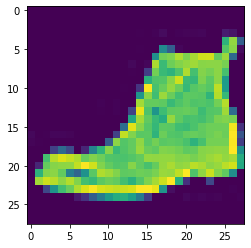

In [4]:
## Run this cell a few times to randomly display some digit data
%matplotlib inline
import matplotlib.pyplot as plt
import random

index = random.randint(0, len(train_images))
# index = 10
print ("Displaying train index = ", index)

print("train label [{}] = {} ".format(index, train_labels[index]))
print ("------------ raw data for train_image[{}] -------".format(index))
print(train_images[index])
print ("--------------------")

plt.imshow(train_images[index])
plt.show()

## Step 3: Shape data

In [5]:
train_images  = train_images / 255.0
test_images = test_images / 255.0

## Step 4: Create model

### TODO : Sketch the neural net
- What is the input dimensions
- how many neurons in layers
- how many output neurons

<img src="../assets/images/neural-net-unknown.png" style="width:30%"/>

In [6]:
## Model 1

model = tf.keras.models.Sequential([
            keras.layers.Reshape(
              target_shape=(28 * 28,), input_shape=(28, 28)
              ),
            tf.keras.layers.Dense(128, activation=tf.nn.relu), 
            tf.keras.layers.Dense(10, activation=tf.nn.softmax)
            ])


model.compile(
  optimizer=tf.keras.optimizers.Adam(),  # 'adam'
  loss='sparse_categorical_crossentropy',
  metrics=['accuracy'])

print (model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________
None


In [7]:
## Model 2

# model = keras.Sequential([
#     keras.layers.Reshape(
#       target_shape=(28 * 28,), input_shape=(28, 28)
#     ),
#     keras.layers.Dense(
#       units=256, activation=tf.nn.relu  #'relu'
#     ),
#     keras.layers.Dense(
#       units=192, activation=tf.nn.relu  #'relu'
#     ),
#     keras.layers.Dense(
#       units=128, activation=tf.nn.relu  #'relu'
#     ),
#     keras.layers.Dense(
#       units=10, activation=tf.nn.softmax #'softmax'
#     )
# ])

# model.compile(
#   optimizer=tf.keras.optimizers.Adam(),  # 'adam'
#   loss='sparse_categorical_crossentropy',
#   metrics=['accuracy'])

# print (model.summary())

## Step 5 - Setup Tensorboard

In [8]:
## This is fairly boiler plate code

import datetime
import os
import shutil

app_name = 'fashion-mnist'

# timestamp  = datetime.datetime.now().strftime("%Y-%m-%d--%H-%M-%S")

tb_top_level_dir= '/tmp/tensorboard-logs'

tb_app_dir = os.path.join (tb_top_level_dir, app_name)

tb_logs_dir = os.path.join (tb_app_dir, datetime.datetime.now().strftime("%H-%M-%S"))


print ("Saving TB logs to : " , tb_logs_dir)

#clear out old logs
shutil.rmtree ( tb_app_dir, ignore_errors=True )

tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=tb_logs_dir, write_graph=True, 
                                                      write_images=True, histogram_freq=1)
## This will embed Tensorboard right here in jupyter!
%load_ext tensorboard
%tensorboard --logdir $tb_logs_dir

Saving TB logs to :  /tmp/tensorboard-logs/fashion-mnist/09-52-40


ERROR: Failed to launch TensorBoard (exited with 255).
Contents of stderr:
E0612 09:52:43.632666 140230248339264 program.py:311] TensorBoard could not bind to any port around 6006 (tried 10 times)
ERROR: TensorBoard could not bind to any port around 6006 (tried 10 times)

## Step 6: Training the model


In [9]:
%%time

epochs=10
print ("training starting ...")

history = model.fit(
    train_images,
    train_labels,
    epochs=epochs,
    validation_split=0.2,
    verbose=1,
    callbacks=[tensorboard_callback]
)

print ("training done.")

training starting ...
Epoch 1/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.5180 - accuracy: 0.8179 - val_loss: 0.4082 - val_accuracy: 0.8538
Epoch 2/10
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3882 - accuracy: 0.8615 - val_loss: 0.3821 - val_accuracy: 0.8673
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3482 - accuracy: 0.8739 - val_loss: 0.3702 - val_accuracy: 0.8712
Epoch 4/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3220 - accuracy: 0.8827 - val_loss: 0.3389 - val_accuracy: 0.8798
Epoch 5/10
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3009 - accuracy: 0.8907 - val_loss: 0.3406 - val_accuracy: 0.8783
Epoch 6/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2839 - accuracy: 0.8956 - val_loss: 0.3368 - val_accuracy: 0.8815
Epoch 7/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.2706 - accuracy: 0.8996 - val_l

## Step 7 : See Training History

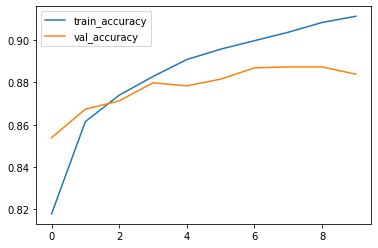

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()

## Step 8 - Predict

**==> Compare prediction time vs training time.  Prediction is very quick!**

In [11]:
%%time 

print ("predicting on {:,} images".format(len(test_images)))
predictions = model.predict(test_images)


predicting on 10,000 images
CPU times: user 2.07 s, sys: 1.9 s, total: 3.97 s
Wall time: 1.23 s


random index =  4889
test_label[4889] = 4.  So the number is 4
prediction of test_image[4889] = [ 0.000  0.000  0.029  0.000  0.963  0.000  0.008  0.000  0.000  0.000]
max softmax output =  0.9627787
index of max softmax output = 4.  So the prediction is same (4)


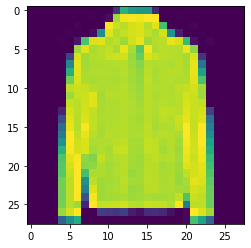

In [12]:
## Print a sample prediction

%matplotlib inline
import matplotlib.pyplot as plt
import random
import numpy as np
from pprint import pprint

np.set_printoptions(formatter={'float': '{: 0.3f}'.format})

index = random.randint(0, len(test_images))

print ("random index = ", index)
print ("test_label[{}] = {}.  So the number is {}".format(index, test_labels[index], test_labels[index]))
print ("prediction of test_image[{}] = {}".format(index, predictions[index]))
print ('max softmax output = ', np.amax(predictions[index]))
print ('index of max softmax output = {}.  So the prediction is same ({})'.format(np.argmax(predictions[index]), np.argmax(predictions[index])))

plt.imshow(test_images2[index])

## Step 9 : Evaluate the Model 

### 9.1 - Metrics

In [13]:
metric_names = model.metrics_names
print ("model metrics : " , metric_names)

metrics = model.evaluate(test_images, test_labels, verbose=0)

for idx, metric in enumerate(metric_names):
    print ("Metric : {} = {:,.3f}".format (metric_names[idx], metrics[idx]))

model metrics :  ['loss', 'accuracy']
Metric : loss = 0.349
Metric : accuracy = 0.878


### 9.2 - Confusion Matrix

In [14]:
## our predictions is an array of arrays
print('predictions shape : ', predictions.shape)
print ('prediction 0 : ' , predictions[0])
print ('prediction 1 : ' , predictions[1])

predictions shape :  (10000, 10)
prediction 0 :  [ 0.000  0.000  0.000  0.000  0.000  0.000  0.000  0.003  0.000  0.997]
prediction 1 :  [ 0.000  0.000  0.989  0.000  0.011  0.000  0.001  0.000  0.000  0.000]


In [15]:
## We need to find the final output (max of softmax probabilities for each prediction)
predictions2 = [ np.argmax(p) for p in predictions]
print ('prediction2 0 : ' , predictions2[0])
print ('prediction2 1 : ' , predictions2[1])

prediction2 0 :  9
prediction2 1 :  2


In [16]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(test_labels, predictions2, labels = [0,1,2,3,4,5,6,7,8,9])
cm

array([[831,   1,  19,  22,  10,   1, 108,   0,   8,   0],
       [  4, 967,   1,  21,   4,   0,   2,   0,   1,   0],
       [ 17,   1, 732,  12, 179,   0,  59,   0,   0,   0],
       [ 29,   4,  14, 885,  47,   0,  18,   0,   3,   0],
       [  1,   0,  51,  25, 894,   0,  28,   0,   1,   0],
       [  0,   0,   0,   0,   0, 964,   0,  14,   1,  21],
       [124,   2,  69,  29, 129,   0, 629,   0,  18,   0],
       [  0,   0,   0,   0,   0,  21,   0, 919,   1,  59],
       [  4,   0,   3,   2,   8,   2,   1,   3, 977,   0],
       [  0,   0,   0,   0,   0,   4,   1,  16,   0, 979]])

[]

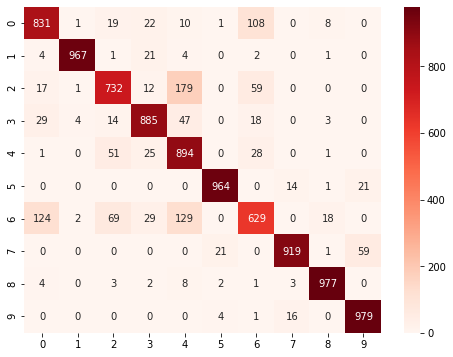

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (8,6))

# colormaps : cmap="YlGnBu" , cmap="Greens", cmap="Blues",  cmap="Reds"
sns.heatmap(cm, annot=True, cmap="Reds", fmt='d').plot()

### 9.3 - Metrics Calculated from Confusion Matrix

In [18]:
from sklearn.metrics import classification_report
from pprint import pprint

pprint(classification_report(test_labels, predictions2, output_dict=True))

{'0': {'f1-score': 0.826865671641791,
       'precision': 0.8227722772277227,
       'recall': 0.831,
       'support': 1000},
 '1': {'f1-score': 0.9792405063291139,
       'precision': 0.9917948717948718,
       'recall': 0.967,
       'support': 1000},
 '2': {'f1-score': 0.7750132345156168,
       'precision': 0.8233970753655793,
       'recall': 0.732,
       'support': 1000},
 '3': {'f1-score': 0.8867735470941883,
       'precision': 0.8885542168674698,
       'recall': 0.885,
       'support': 1000},
 '4': {'f1-score': 0.7873183619550859,
       'precision': 0.7033831628638867,
       'recall': 0.894,
       'support': 1000},
 '5': {'f1-score': 0.9678714859437753,
       'precision': 0.9717741935483871,
       'recall': 0.964,
       'support': 1000},
 '6': {'f1-score': 0.6814734561213435,
       'precision': 0.7434988179669031,
       'recall': 0.629,
       'support': 1000},
 '7': {'f1-score': 0.9415983606557378,
       'precision': 0.9653361344537815,
       'recall': 0.919,
  

## Step 10 : Improve the Model

Try the following exercises

**1 - Increase epochs**  
- In Step-6, increase epochs to 50
- Rerun the notebook
- did the accuracy improve?
- how much the training time go up?

**2 - Build a deeper neural net** 
- IN Step-4, uncomment and use 'model-2'.  This is a wider/deeper model
- Rerun the notebook again
- did the accuracy improve?
- how much the training time go up?